# Model Invidual Classes

Just one class at a time.

In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from pathlib import Path
import os
import random

import shutil

from IPython.display import clear_output

In [2]:
PROJ_DIR = Path(os.path.abspath("")).parent
PROJ_DIR

PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud')

In [3]:
path_train_img = PROJ_DIR / "data" / "raw" / "train_images"
path_train_labels = PROJ_DIR / "data" / "raw" / "train_labels"
path_test_img = PROJ_DIR / "data" / "raw" / "test_images"

In [4]:
fnames = get_image_files(path_train_img)
fnames[:3]

[PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/6550e47.jpg'),
 PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/ade61a0.jpg'),
 PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/cc841a2.jpg')]

In [5]:
df_labels = pd.read_csv(PROJ_DIR / "data/raw/train.csv")
df_labels.head(10)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


## Open one image

for reference values.

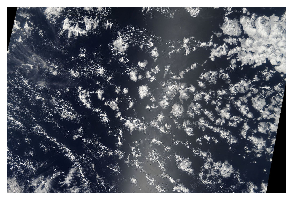

In [6]:
img = open_image(random.choice(fnames))
img.show(figsize=(5, 5))

In [7]:
size = np.array(img.shape[-2:])
size

array([1400, 2100])

## Model individual classes

In [8]:
cloud_classes = ["Fish", "Flower", "Gravel", "Sugar"]
cloud_classes

['Fish', 'Flower', 'Gravel', 'Sugar']

### Filter each cloud class

In [9]:
# cloud_labels = {}

# for cloud_class in cloud_classes:

#     df_temp = df_labels[df_labels.Image_Label.apply(lambda x: cloud_class in x)]
#     df_temp = df_temp[~df_temp.EncodedPixels.isna()]

#     cloud_labels[cloud_class] = df_temp

In [10]:
# for k in cloud_labels:
#     print(f"{k} => {cloud_labels[k].shape}")

### Move images to folders

 Move the image having a particular class to train_cls folder.

In [11]:
# for k in cloud_labels:
#     df_temp = cloud_labels[k]

#     # Create the dir
#     path_train_img_class = PROJ_DIR / f"data/raw/train_{k}"
#     if not os.path.exists(path_train_img_class):
#         os.mkdir(path_train_img_class)

#     # Copy files
#     for row in df_temp.Image_Label.values:
#         f_name = row.split("_")[0]
#         clear_output(wait=True)
#         if not os.path.exists(path_train_img_class/f_name):
#             print(f'Copying {f_name}')
#             shutil.copy(path_train_img/f_name, path_train_img_class/f_name)
#         else:
#             print(f'{f_name} already exists')

Generate labels and save them in train_labels_cls folder.

In [12]:
# for k in cloud_labels:
#     df_temp = cloud_labels[k]

#     # Create the labels dir
#     path_train_lables_class = PROJ_DIR / f"data/raw/train_labels_{k}"
#     if not os.path.exists(path_train_lables_class):
#         os.mkdir(path_train_lables_class)

#     for row in df_temp.iterrows():
#         f_name = row[1]["Image_Label"].split("_")[0]
#         print(f'Moving {f_name} for {k}')
#         clear_output(wait=True)

#         mask = open_mask_rle(row[1]["EncodedPixels"], (1400, 2100))
#         mask = ImageSegment(mask.data.permute(0, 2, 1))

#         target_path = path_train_lables_class / f"{f_name.split('.')[0]}.png"
#         if not os.path.exists(target_path):
#             mask.save(target_path)
#         else:
#             print("Label already exists")

### Fish

In [13]:
k = "Fish"
path_train_img_class = PROJ_DIR / f"data/raw/train_{k}"
path_train_img_class

PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_Fish')

In [14]:
path_train_lables_class = PROJ_DIR / f"data/raw/train_labels_Fish"
get_y_fn = lambda x: path_train_lables_class/f'{x.stem}.png'

In [15]:
mask = open_mask(get_y_fn(Path("0a969b9.png")), div=True)
np.unique(mask.data)

array([0, 1])

In [16]:
mask_size = size // 4
mask_size

array([350, 525])

In [17]:
bs = 2

In [19]:
codes = ['Void', 'Fish']

In [20]:
src = (
    SegmentationItemList.from_folder(path_train_img_class)
    .split_by_rand_pct()
    .label_from_func(get_y_fn, classes=codes)
)
src

LabelLists;

Train: LabelList (2225 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: /home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_Fish;

Valid: LabelList (556 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: /home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_Fish;

Test: None

In [21]:
data = (
    src.transform(get_transforms(), size=mask_size, tfm_y=True)
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)
data

ImageDataBunch;

Train: LabelList (2225 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525)
Path: /home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_Fish;

Valid: LabelList (556 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525)
Path: /home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_Fish;

Test: None

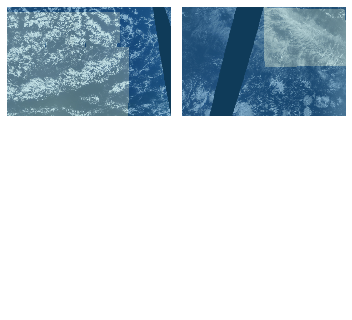

In [22]:
data.show_batch(2, figsize=(5, 5))

In [23]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [24]:
metrics=acc_camvid

In [25]:
wd=1e-2

In [26]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [27]:
lr_find(learn)

RuntimeError: CUDA error: device-side assert triggered

In [28]:
learn.summary()

RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "/home/pankaj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/pin_memory.py", line 27, in _pin_memory_loop
    data = pin_memory(data)
  File "/home/pankaj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/pin_memory.py", line 51, in pin_memory
    return [pin_memory(sample) for sample in data]
  File "/home/pankaj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/pin_memory.py", line 51, in <listcomp>
    return [pin_memory(sample) for sample in data]
  File "/home/pankaj/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/_utils/pin_memory.py", line 43, in pin_memory
    return data.pin_memory()
RuntimeError: cuda runtime error (59) : device-side assert triggered at /tmp/pip-req-build-p5q91txh/aten/src/THC/THCCachingHostAllocator.cpp:296


In [ ]:
mask_size